In [1]:
# Importin Libraries

import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz

# ETL (Extract, Tranform, Load)

### Data Extraction

In [2]:
# Defining Directories

dir_main = "C:\\Users\\nalantha\\Documents\\Palette_Skils\\Stream-3\\Project\\"
# Reading Yields
directory_rm_yields = dir_main + 'rm-yields-data.csv'
df_rm_yields=pd.read_csv(directory_rm_yields)
# Reading GIS
directory_gis= dir_main + 'SK_RM_Shapefiles\\RuralMunicipality.shp'
gdf_rm=gpd.read_file(directory_gis)

### Data Transformation

In [3]:
df_rm_yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25607 non-null  int64  
 1   RM            25607 non-null  int64  
 2   Winter Wheat  3104 non-null   float64
 3   Canola        14588 non-null  float64
 4   Spring Wheat  25498 non-null  float64
 5   Mustard       4680 non-null   float64
 6   Durum         11926 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          24348 non-null  float64
 9   Lentils       5907 non-null   float64
 10  Peas          8703 non-null   float64
 11  Barley        25272 non-null  float64
 12  Fall Rye      15914 non-null  float64
 13  Canary Seed   3941 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          21310 non-null  float64
 17  Chickpeas     1296 non-null   float64
dtypes: float64(16), int64(2)
m

In [4]:
df_rm_yields.isna().sum()

Year                0
RM                  0
Winter Wheat    22503
Canola          11019
Spring Wheat      109
Mustard         20927
Durum           13681
Sunflowers      24661
Oats             1259
Lentils         19700
Peas            16904
Barley            335
Fall Rye         9693
Canary Seed     21666
Spring Rye      24802
Tame Hay        21402
Flax             4297
Chickpeas       24311
dtype: int64

In [5]:
# Changing Pounds to bushels

df_rm_yields['Lentils']=df_rm_yields['Lentils']/60
df_rm_yields['Mustard']=df_rm_yields['Mustard']/50
df_rm_yields['Canary Seed']=df_rm_yields['Canary Seed']/50
df_rm_yields['Chickpeas']=df_rm_yields['Chickpeas']/60
df_rm_yields['Sunflowers']=df_rm_yields['Sunflowers']/30

df_rm_yields.drop(["Year","RM"], axis=1).describe().T

count       mean        std       min    25%    50%  \
Winter Wheat   3104.0  38.337729  12.321936  3.000000  30.00  38.00   
Canola        14588.0  24.564054   9.603160  0.000000  18.00  23.10   
Spring Wheat  25498.0  26.196668  11.631959  0.000000  19.00  26.00   
Mustard        4680.0  16.722636   5.606910  0.712000  13.00  16.72   
Durum         11926.0  29.200370  10.113954  0.000000  23.00  28.30   
Sunflowers      946.0  23.087664  18.525887  0.000000   0.00  26.35   
Oats          24348.0  47.675041  22.555618  0.000000  33.00  46.20   
Lentils        5907.0  19.649733   6.956639  0.766667  15.00  19.50   
Peas           8703.0  31.240917  10.474982  0.000000  24.30  31.20   
Barley        25272.0  38.470558  17.057229  0.000000  26.40  38.00   
Fall Rye      15914.0  21.306786  10.237820  0.000000  15.00  20.00   
Canary Seed    3941.0  20.038293   7.260247  0.120000  15.14  20.00   
Spring Rye      805.0   7.575776  12.473814  0.000000   0.00   0.00   
Tame Hay       4205.0   1.181520   0.654725  0.000000   0.75   1.20   
Flax          21310.0  14.431579   7.199819  0.000000   9.00  14.00   
Chickpeas      1296.0  18.466785  12.767995  0.118333   8.00  20.00   

                    75%     max  
Winter Wheat  45.800000   90.00  
Canola        30.000000   60.10  
Spring Wheat  32.000000  198.00  
Mustard       20.000000   50.00  
Durum         34.500000   88.10  
Sunflowers    36.666667   80.00  
Oats          60.000000  165.10  
Lentils       24.100000   56.85  
Peas          38.300000   86.80  
Barley        49.100000  105.94  
Fall Rye      26.500000  108.00  
Canary Seed   24.160000   54.54  
Spring Rye    20.000000   46.50  
Tame Hay       1.570000    4.00  
Flax          19.490000  110.00  
Chickpeas     27.512500   90.00

In [6]:
df_major_crops=df_rm_yields[['Year', 'RM', 'Canola', 'Spring Wheat',
       'Durum','Oats', 'Lentils', 'Peas', 'Barley']]
df_major_crops.drop(["Year","RM"], axis=1).describe().T

count       mean        std       min   25%   50%   75%  \
Canola        14588.0  24.564054   9.603160  0.000000  18.0  23.1  30.0   
Spring Wheat  25498.0  26.196668  11.631959  0.000000  19.0  26.0  32.0   
Durum         11926.0  29.200370  10.113954  0.000000  23.0  28.3  34.5   
Oats          24348.0  47.675041  22.555618  0.000000  33.0  46.2  60.0   
Lentils        5907.0  19.649733   6.956639  0.766667  15.0  19.5  24.1   
Peas           8703.0  31.240917  10.474982  0.000000  24.3  31.2  38.3   
Barley        25272.0  38.470558  17.057229  0.000000  26.4  38.0  49.1   

                 max  
Canola         60.10  
Spring Wheat  198.00  
Durum          88.10  
Oats          165.10  
Lentils        56.85  
Peas           86.80  
Barley        105.94

## Get RM geometry data 

In [8]:
# RM geometry data
gdf_rm_clean=gdf_rm[['RMNO', 'RMNM', 'geometry']].copy()
# Need to change Object to Int
gdf_rm_clean['RMNO']=gdf_rm_clean['RMNO'].astype(int).copy()
# Changin CRS system to regular lon and lat
gdf_rm_clean=gdf_rm_clean.to_crs(4326).copy()

# Exploratory Data Analysis

## Missing values

## GIS Analysis

In [14]:
# Merging Yield data with GIS
gdf_rm_yield_major_crops=pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_major_crops, on='RM', how='inner')

In [15]:
# looking at unique RM names for GIS data 
print("Former rural municipalities")
np.setdiff1d( df_major_crops['RM'].unique(), gdf_rm_yield_major_crops['RM'].unique(), assume_unique=False)

Former rural municipalities


array([278, 408, 529], dtype=int64)

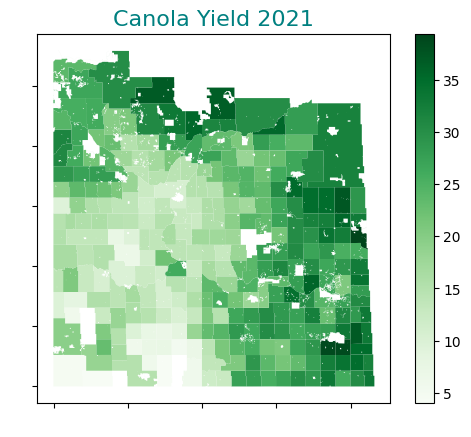

In [16]:
# Plot can be displayed in GitHub
gdf_rm_yield_major_crops[gdf_rm_yield_major_crops['Year']==2021]\
    .plot(column='Canola',
             cmap='Greens',
             legend=True)
plt.title('Canola Yield 2021', color='teal', size=16)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

C:\Users\nalantha\AppData\Local\Temp\ipykernel_63508\1211118844.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


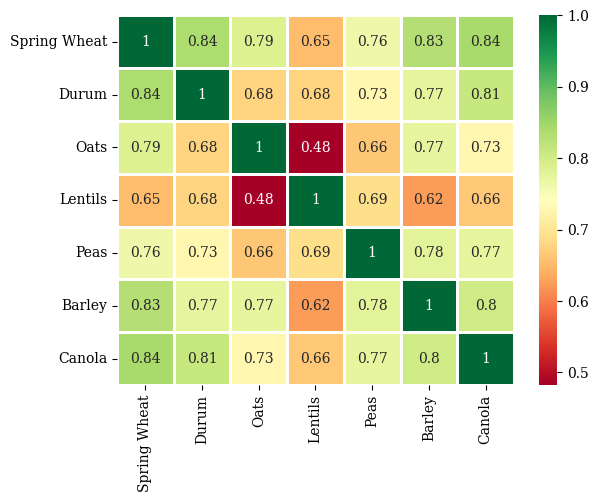

In [21]:
# crops - is a list defined in mapping cell
# >0.2 slight correlation
# >0.4 Moderate corrleation
# > 0.6 High
# > 0.8 Very correlation 
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}
plt.rc('font', **font)
# Pearson Correlation
svm = sb.heatmap(df_major_crops.loc[df_major_crops['Year']>2000][crops].corr(),
           annot=True,
           cmap='RdYlGn', linewidths=1)
figure = svm.get_figure()    
#figure.savefig('svm_conf.png', dpi=600,bbox_inches="tight")
figure.show()
# Rank correlatation

## Outliers

**Before treating**

C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


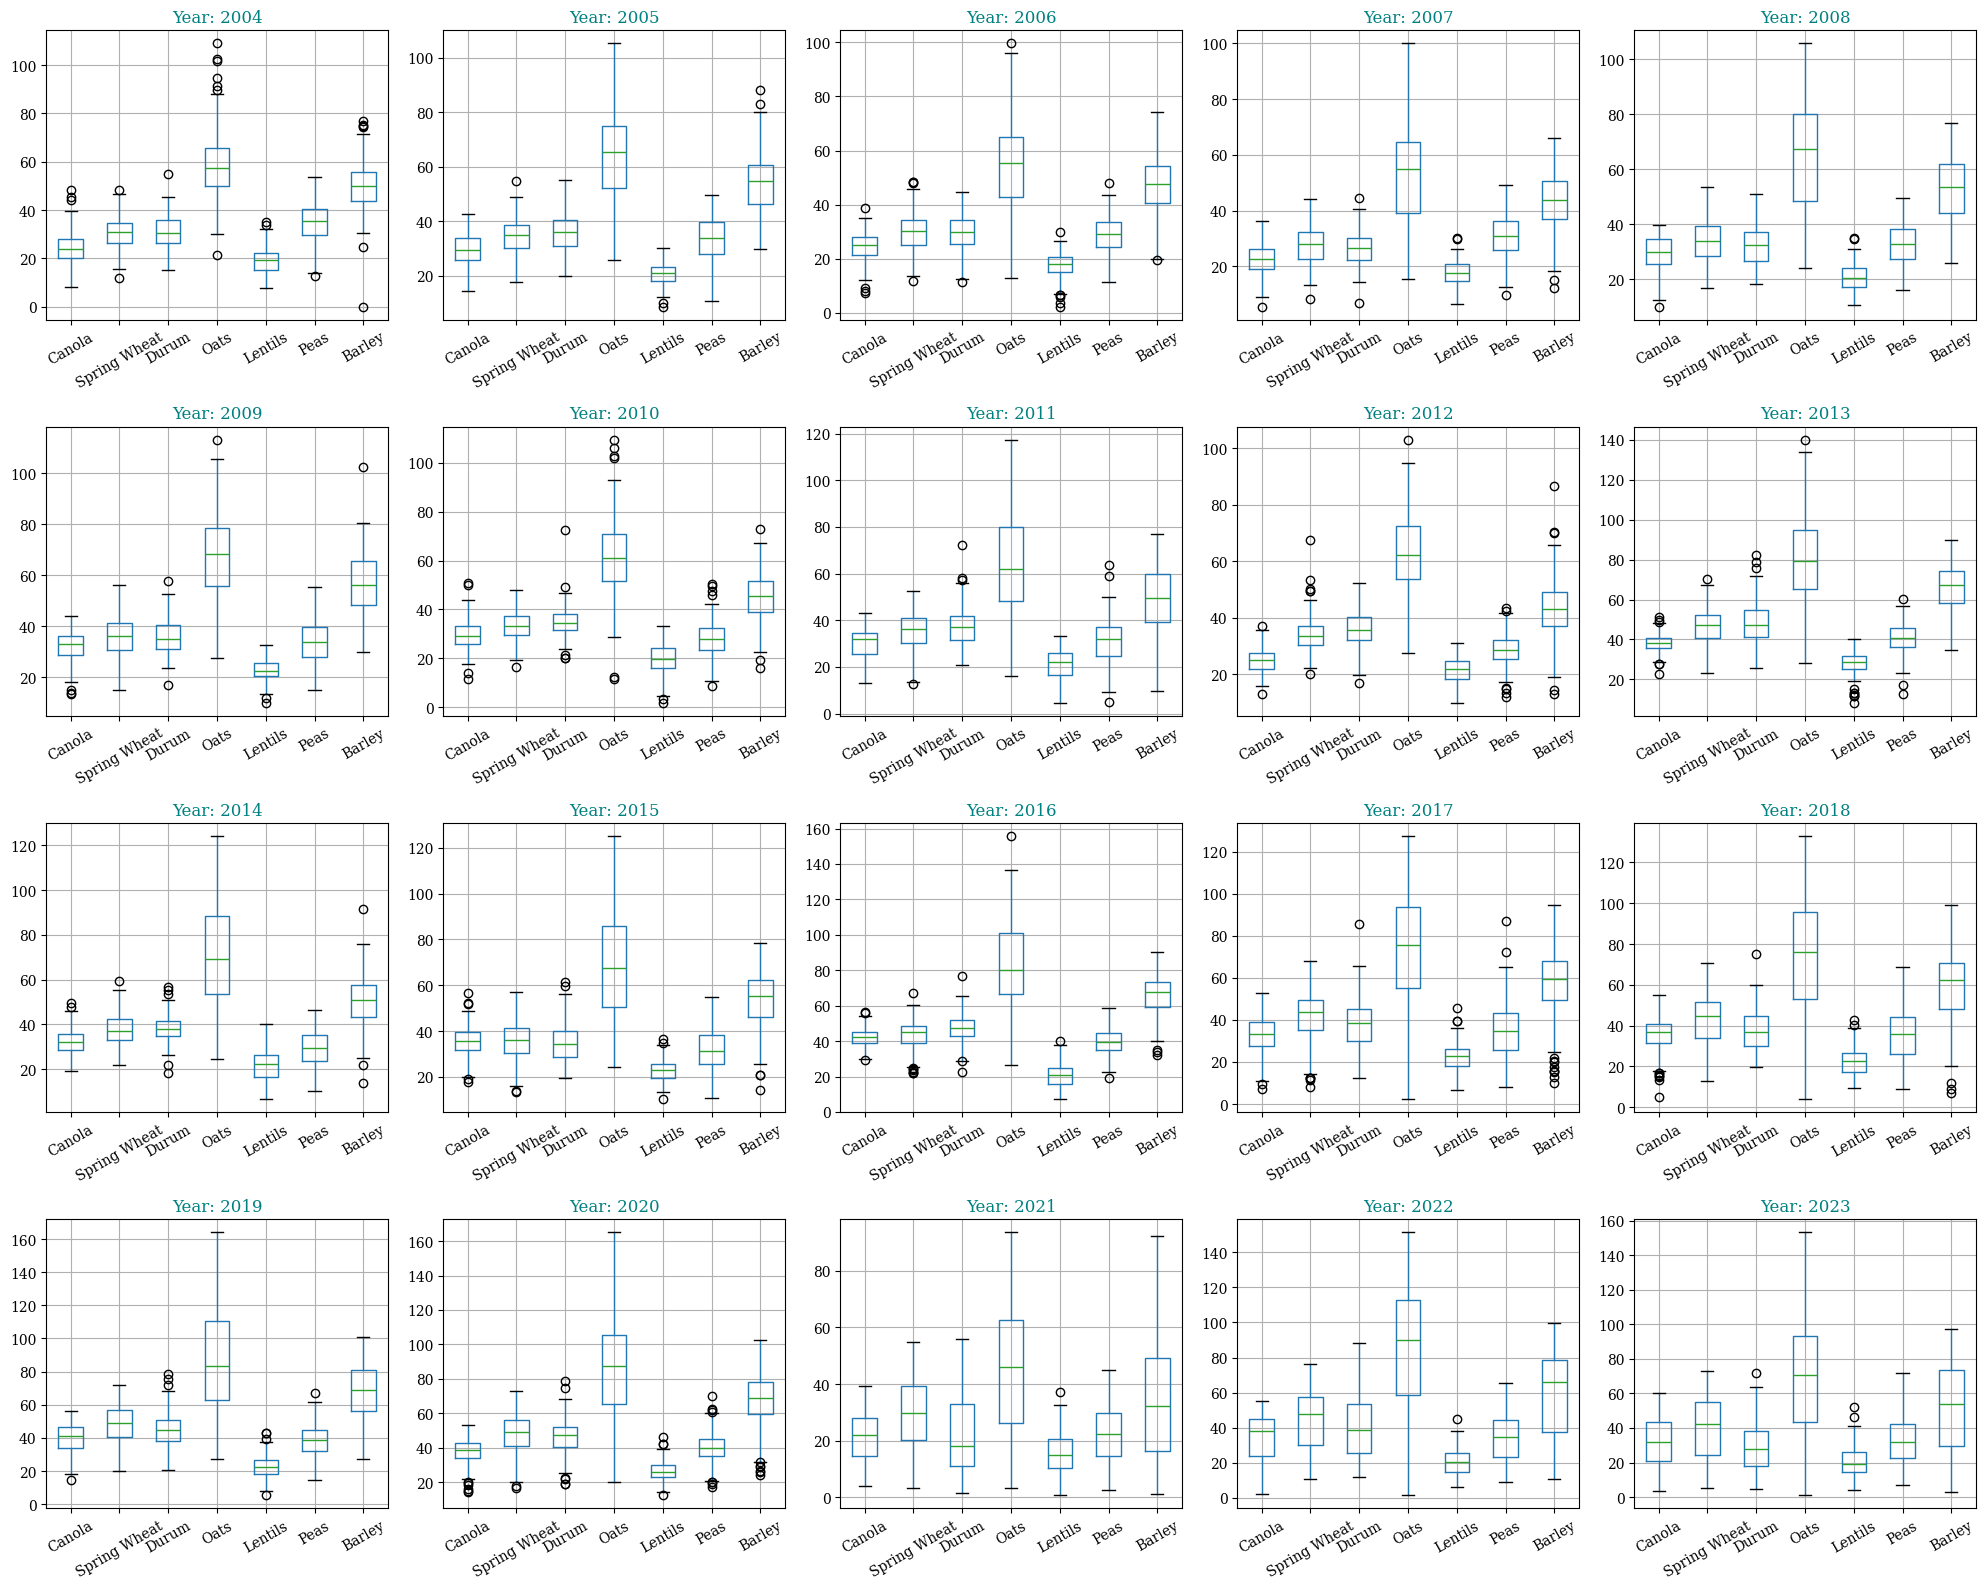

In [22]:
# Filter the DataFrame for the years 2004-2023
filtered_df = gdf_rm_yield_major_crops[(df_major_crops['Year'] >= 2000) & (df_major_crops['Year'] <= 2023)]

# Define the list of crops
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the years and create a boxplot for each crop
for i, year in enumerate(range(2004, 2023 + 1)):
    if i < len(axes):
        ax = axes[i]
        year_data = filtered_df[filtered_df['Year'] == year]
        year_data.boxplot(column=crops, ax=ax)
        ax.set_title(f'Year: {year}', size=12, color='teal')
        ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


**After treating**

In [23]:
# Define the list of crops
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Calculate mean and standard deviation for each crop
means = df_major_crops[crops].mean()
stds = df_major_crops[crops].std()

# Determine the clipping bounds
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds

# Clip the data
df_clipped = df_major_crops.copy()
for crop in crops:
    df_clipped[crop] = df_major_crops[crop].clip(lower=lower_bounds[crop], upper=upper_bounds[crop])

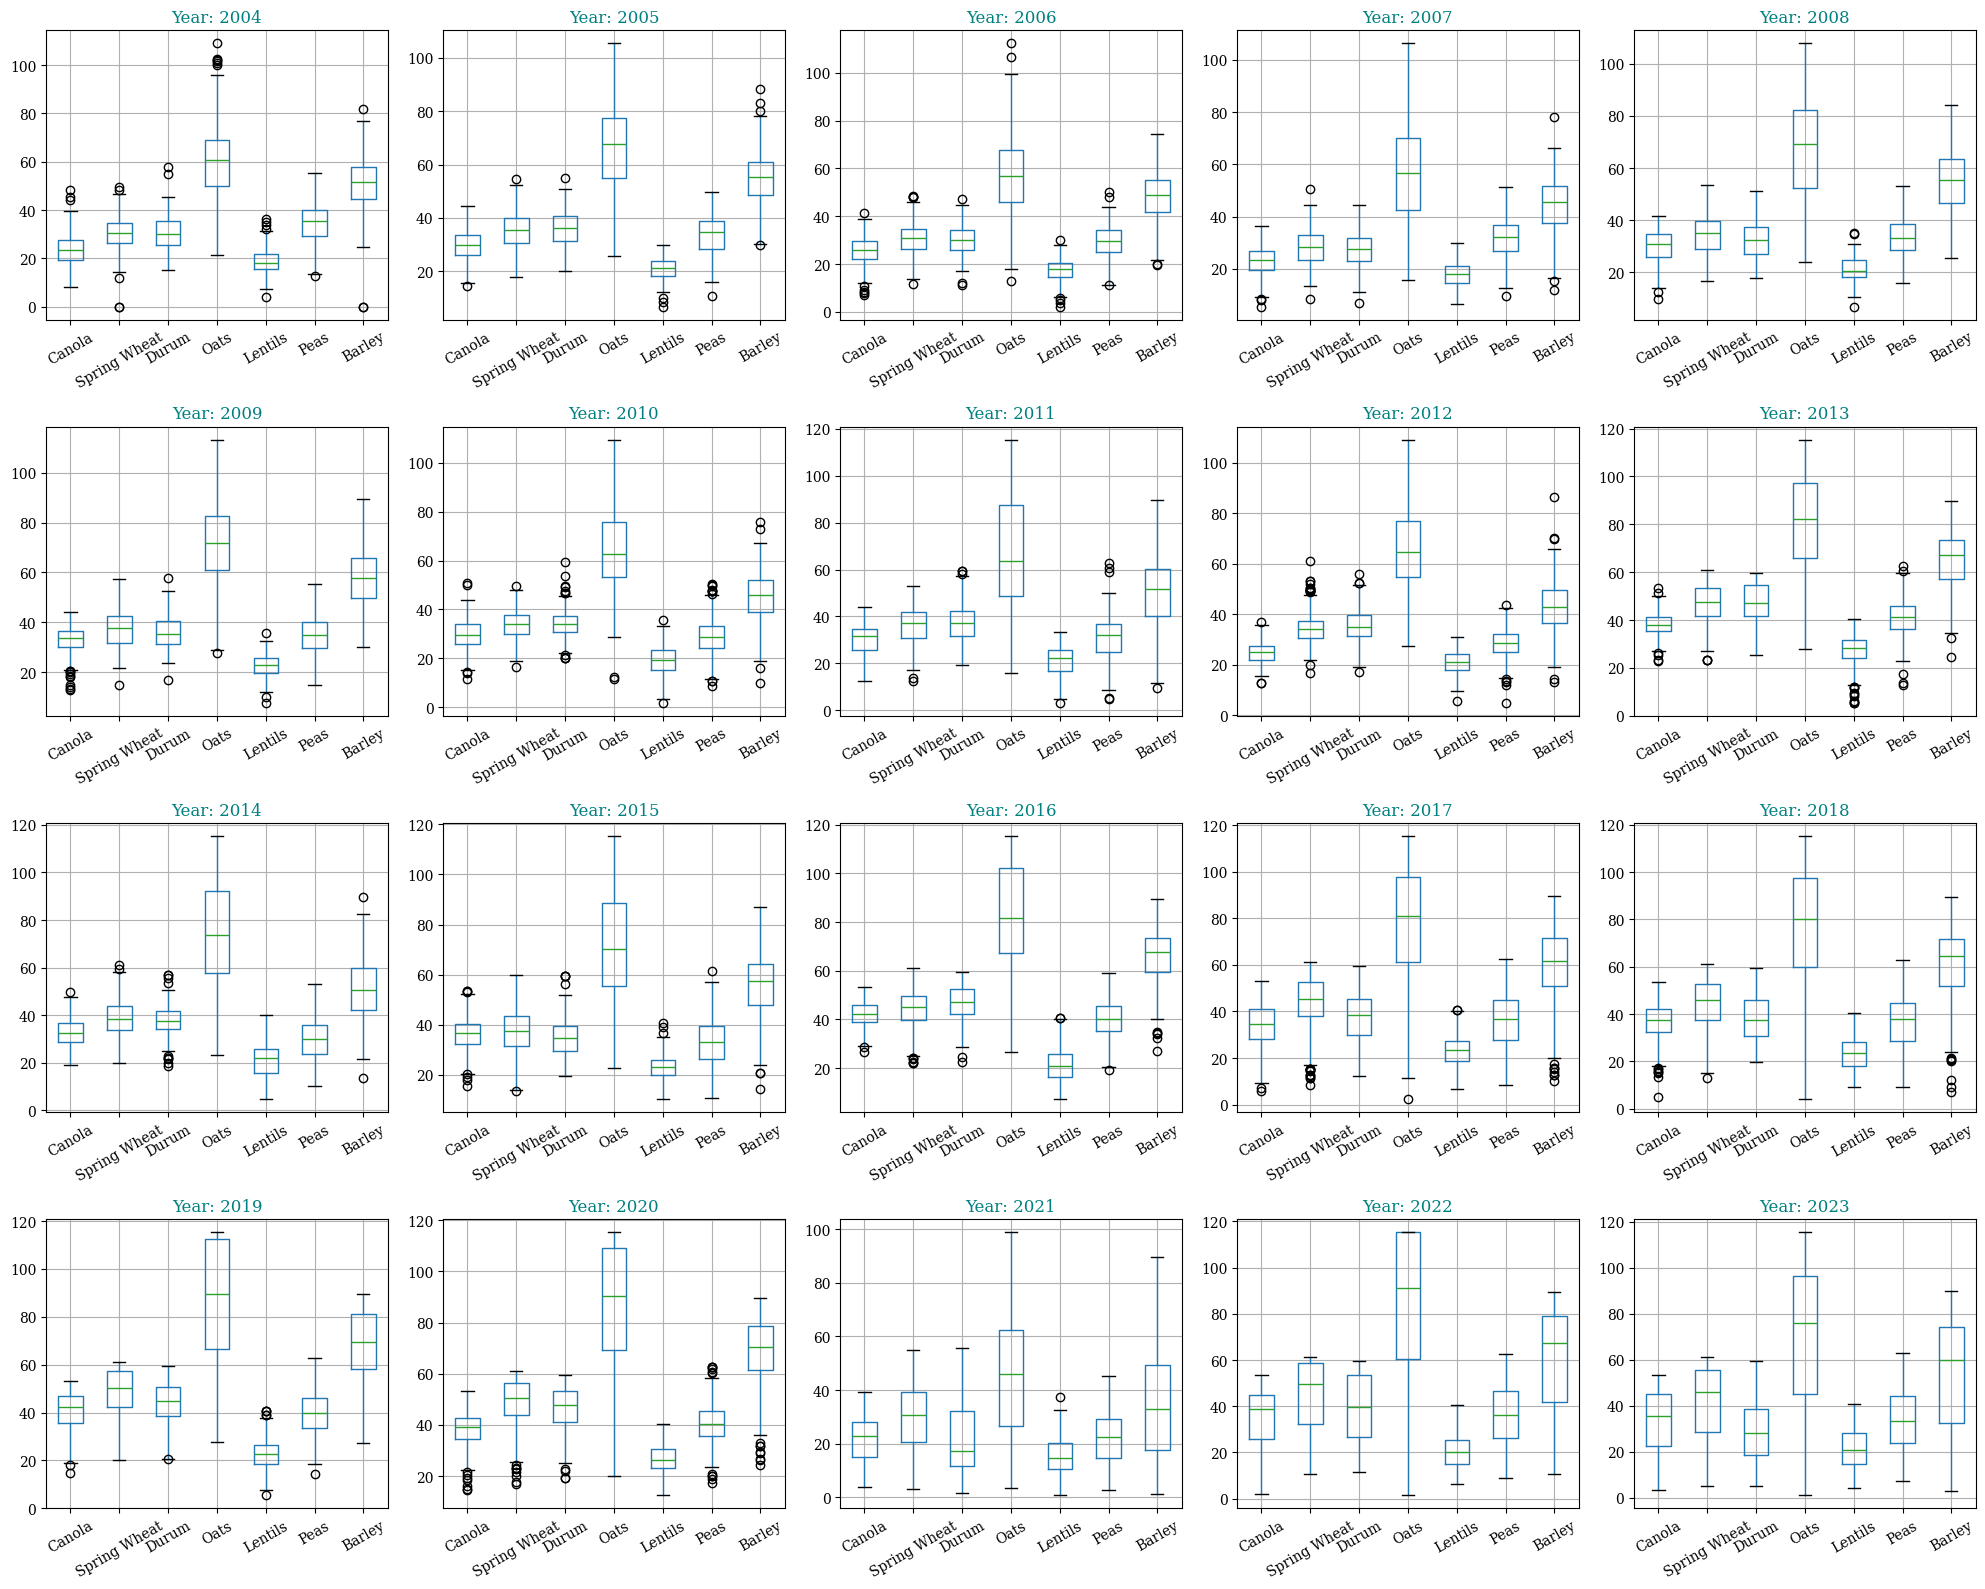

In [24]:
# Define the list of crops
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the years and create a boxplot for each crop
for i, year in enumerate(range(2004, 2023 + 1)):
    if i < len(axes):
        ax = axes[i]
        year_data = df_clipped[df_clipped['Year'] == year]
        year_data.boxplot(column=crops, ax=ax)
        ax.set_title(f'Year: {year}', size=12, color='teal')
        ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## Histograms

# Feature Construction and Selection

In [25]:
df_00_23=df_major_crops[df_major_crops['Year']>=2000]
df_00_23

Year   RM  Canola  Spring Wheat  Durum   Oats  Lentils  Peas  Barley
62     2000    1    25.3          34.7   31.7   57.6      NaN  36.0    44.9
63     2001    1    22.1          25.6   25.7   65.6      NaN  33.0    54.7
64     2002    1    18.2          25.4   23.6   39.9      NaN  25.5    38.6
65     2003    1    15.9          24.9    NaN   34.5      NaN  24.9    38.1
66     2004    1    23.3          37.4    NaN   68.0      NaN  38.4    56.3
...     ...  ...     ...           ...    ...    ...      ...   ...     ...
25602  2019  622    46.1          63.9    NaN  106.0      NaN  33.7    73.9
25603  2020  622    40.9          55.1    NaN   94.5      NaN  49.2    74.3
25604  2021  622    23.9          17.0    NaN   25.8      NaN   NaN    23.3
25605  2022  622    44.4          66.8    NaN   93.0      NaN   NaN    76.9
25606  2023  622    45.9          69.8    NaN  121.3      NaN   NaN    74.8

[7087 rows x 9 columns]

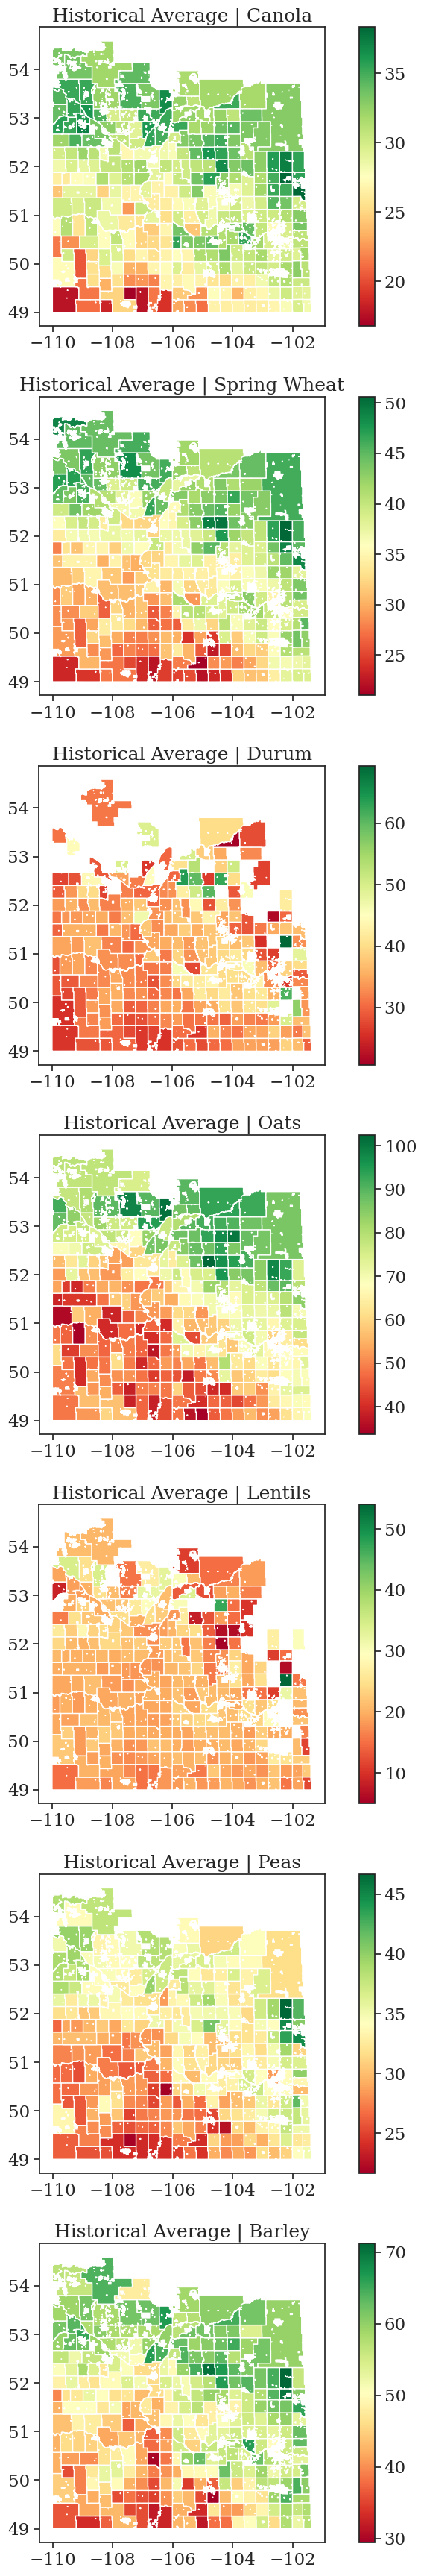

In [45]:
merged_df = pd.merge(
    gdf_rm_clean.rename(columns={'RMNO': 'RM'}),
    df_00_23.groupby('RM').mean(),
    on='RM'
)

# List of crops
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Create a subplot for each crop
fig, axes = plt.subplots(nrows=len(crops), figsize=(10, 5 * len(crops)))

# Plot each crop
for i, crop in enumerate(crops):
    merged_df.plot(column=crop, cmap='RdYlGn', legend=True, ax=axes[i])
    axes[i].set_title(f'Historical Average | {crop}')

plt.tight_layout()
plt.show()


In [28]:
# List of crops
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Group by 'RM' and calculate mean and standard deviation for each crop
df_agg_00_23 = df_00_23.groupby('RM')[crops].agg(['mean', 'std'])

# Flatten the column multi-index
df_agg_00_23.columns = ['_'.join(col).strip() for col in df_agg_00_23.columns.values]

# Reset index to make 'RM' a column again
df_agg_00_23.reset_index(inplace=True)


In [29]:
# Feature Construction Completed
# Mean and STD features are created
df_agg_00_23

RM  Canola_mean  Canola_std  Spring Wheat_mean  Spring Wheat_std  \
0      1    28.314583    7.251919          38.569130          9.937700   
1      2    29.668750    5.456009          38.728261          8.209199   
2      3    27.938750    6.955191          37.818750          8.898998   
3      4    26.847917    6.624128          34.304583          8.999300   
4      5    26.401667    7.654146          31.305000          7.488937   
..   ...          ...         ...                ...               ...   
291  520    31.642917   11.245617          41.914167         12.705160   
292  555    34.171765   12.309706          45.965385         21.635478   
293  561    33.493636   10.563191          44.946087         14.381770   
294  588    31.999583    9.736271          44.596250         12.508024   
295  622    33.302500   11.868386          48.816250         16.470610   

     Durum_mean  Durum_std  Oats_mean   Oats_std  Lentils_mean  Lentils_std  \
0     29.716000   5.769946  68.702917  21.210231     11.716667     0.589256   
1     36.761250  12.107829  65.697917  15.301719     18.819643     9.439195   
2     38.888750   8.297462  61.715417   9.990864     15.459217     7.746315   
3     34.329583  10.130348  53.237619  17.791265     21.702795     7.636129   
4     34.202083   9.808930  51.038462  15.160395     19.988108     5.764766   
..          ...        ...        ...        ...           ...          ...   
291         NaN        NaN  89.890952  27.648040     11.116667          NaN   
292         NaN        NaN  74.849412  25.576126           NaN          NaN   
293         NaN        NaN  77.994500  19.927426     21.083333    17.206265   
294   31.250000  14.361407  78.482917  20.325299     20.659524     7.235739   
295         NaN        NaN  79.000417  26.985072           NaN          NaN   

     Peas_mean   Peas_std  Barley_mean  Barley_std  
0    34.991667   9.203351    57.301739   18.607237  
1    34.091667   9.293425    52.302083    9.806744  
2    31.004167   7.430518    57.693333   10.757646  
3    29.908696   6.344497    45.924583   10.585443  
4    31.752381   6.896783    54.778571   15.952418  
..         ...        ...          ...         ...  
291  33.743478  13.712331    58.897083   16.703247  
292        NaN        NaN    47.779000   23.750120  
293  33.790476  13.260049    56.213043   18.604493  
294  37.920833   9.633997    64.087083   14.686782  
295  38.641667  12.640013    56.915652   15.653869  

[296 rows x 15 columns]

- Unsupervised ML - no train, not test and not validation dataset
- We do not standardise or normalize , min/max scaler, bucketizing, data in this spesific dataset, because mean and std of crops are the same unit.

In [30]:
# Function to bucketize the year into decades
def bucketize_decade(year):
    decade_start = (year // 10) * 10
    decade_end = decade_start + 9
    return f"{decade_start}-{decade_end}"

# Create a new column 'decade' using the function
df_major_crops['decade'] = df_major_crops['Year'].apply(bucketize_decade)

C:\Users\nalantha\AppData\Local\Temp\ipykernel_63508\1963650606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major_crops['decade'] = df_major_crops['Year'].apply(bucketize_decade)


In [31]:
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']
df_major_crops[crops+['decade']].groupby('decade').mean()

Canola  Spring Wheat      Durum       Oats    Lentils  \
decade                                                                
1930-1939   0.000000     12.676271   0.000000  22.852542        NaN   
1940-1949        NaN     15.673135        NaN  26.934443        NaN   
1950-1959   0.000000     18.788963   0.000000  34.478363        NaN   
1960-1969  18.174603     20.976522   0.000000  39.788416        NaN   
1970-1979  18.164935     25.602611  24.871981  49.010771        NaN   
1980-1989  19.515255     25.078239  23.853953  45.541974        NaN   
1990-1999  22.070211     29.886936  30.258414  57.449728  17.665617   
2000-2009  24.004022     29.572203  29.103945  56.157899  17.226126   
2010-2019  34.497944     41.021176  39.831252  75.380830  22.351540   
2020-2029  32.343966     42.080645  34.936035  73.148439  21.493329   

                Peas     Barley  
decade                           
1930-1939        NaN  18.156627  
1940-1949        NaN  20.722883  
1950-1959        NaN  26.336800  
1960-1969        NaN  30.319946  
1970-1979        NaN  39.459987  
1980-1989        NaN  38.661938  
1990-1999  28.518638  47.797332  
2000-2009  28.903573  46.629420  
2010-2019  34.557595  56.459535  
2020-2029  33.352650  54.751096

# ML Modelling

## Spectral Clustering

### Optimal Clusters recommeded by the scores

Optimal number of clusters for Canola: 3
Silhouette scores for Canola: [0.3814564205490793, 0.3885877047664673, 0.34565486635512543, 0.3446311889043455, 0.336539375025111, 0.33803056457241737, 0.3429252134086175, 0.32087673456199095, 0.29793546317126257]


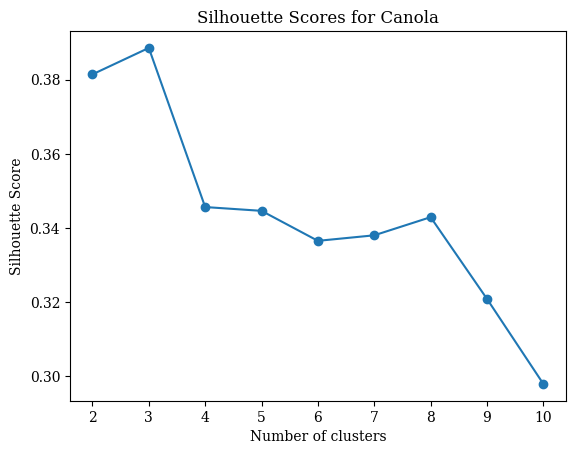

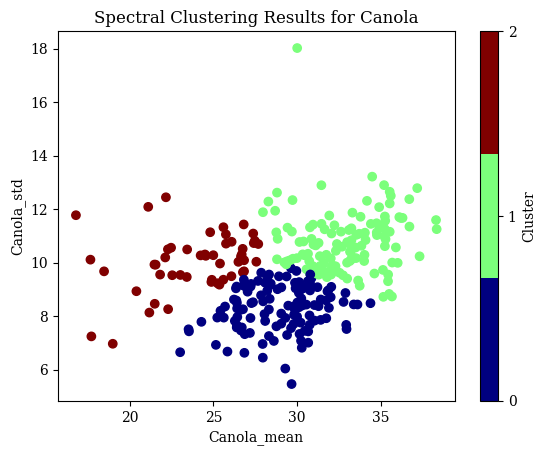

Optimal number of clusters for Spring Wheat: 2
Silhouette scores for Spring Wheat: [0.4526454016915555, 0.4098205148777613, 0.38881110650149975, 0.3903372028919639, 0.30996747937957125, 0.30642903599774574, 0.3168972679440432, 0.29049134582205344, 0.30504601005681137]


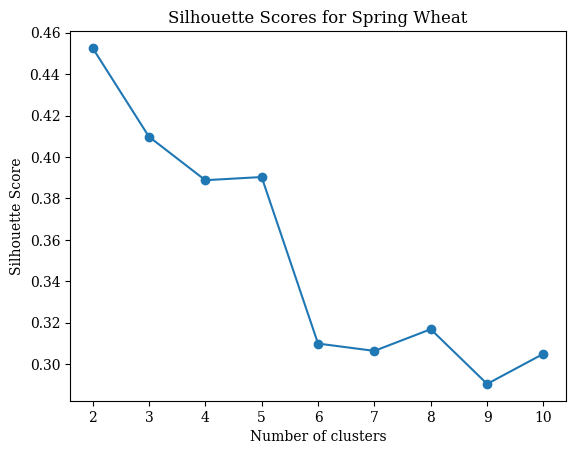

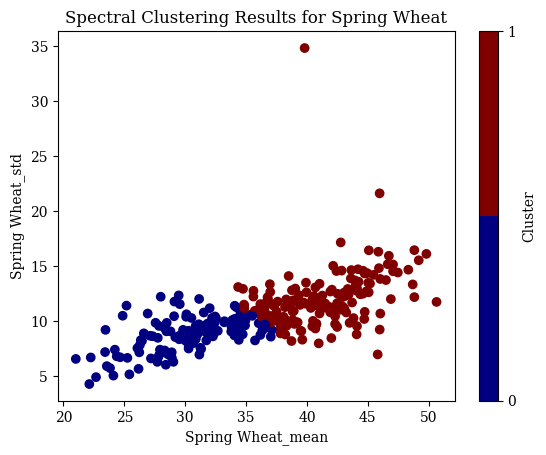

Optimal number of clusters for Durum: 2
Silhouette scores for Durum: [0.6284451116000132, 0.6091423890912017, 0.509376286529849, 0.5153683489872898, 0.40338893868238734, 0.35091180887212337, 0.3608837374922696, 0.3117082033651427, 0.3095636159099605]


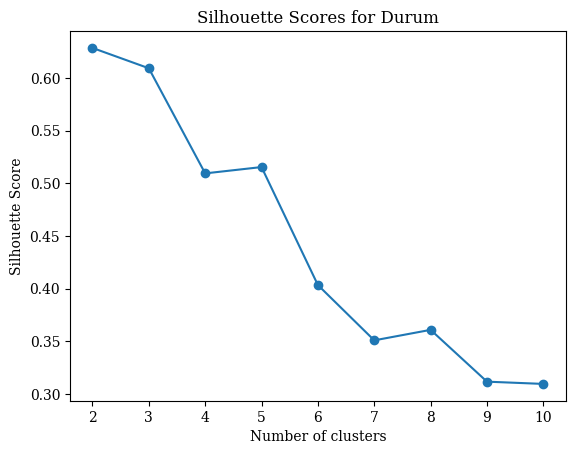

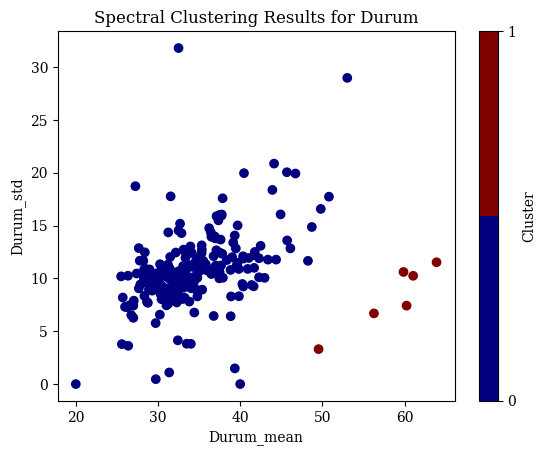

Optimal number of clusters for Oats: 2
Silhouette scores for Oats: [0.48611858215870757, 0.35962638353376186, 0.3952967598647857, 0.3601939538593756, 0.38096086207313024, 0.38597319583252204, 0.36843567332397814, 0.37262712455779173, 0.3697114126420209]


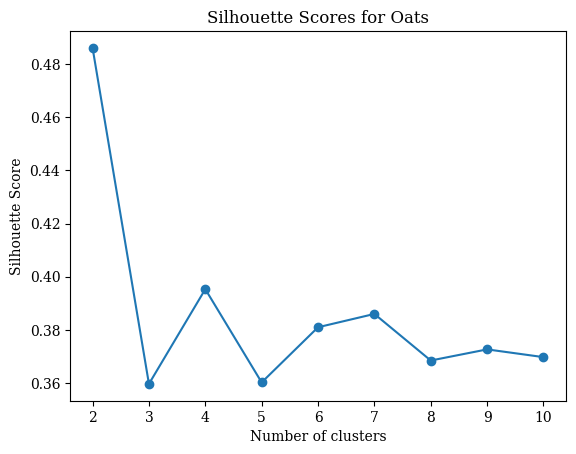

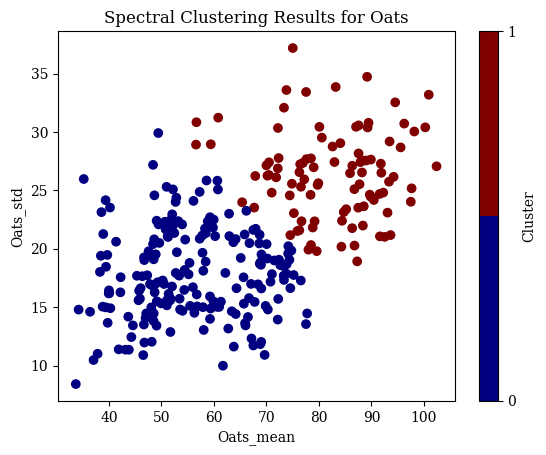

Optimal number of clusters for Lentils: 2
Silhouette scores for Lentils: [0.6312110374398491, 0.5815591963529849, 0.49499704995493554, 0.5407099788067902, 0.49615480342406576, 0.45704700061301307, 0.4285079182305935, 0.4493570184607773, 0.3891888626948434]


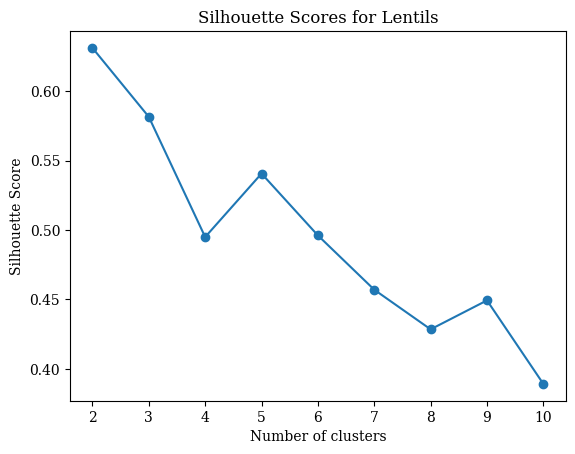

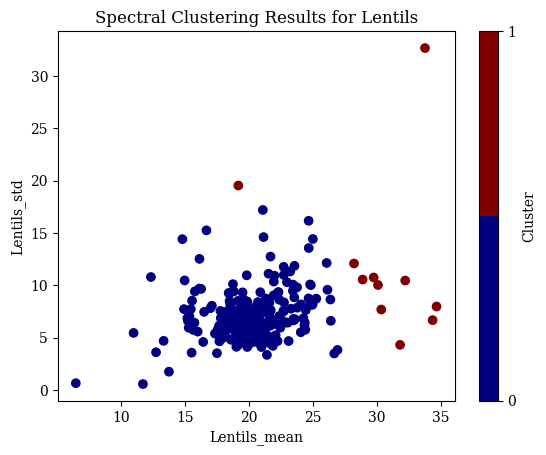

Optimal number of clusters for Peas: 2
Silhouette scores for Peas: [0.4181693484474844, 0.4112574865372375, 0.4112574865372375, 0.35164255909192077, 0.3078804024848918, 0.29754831335725, 0.3183047600348066, 0.27505129584610627, 0.25807773712473886]


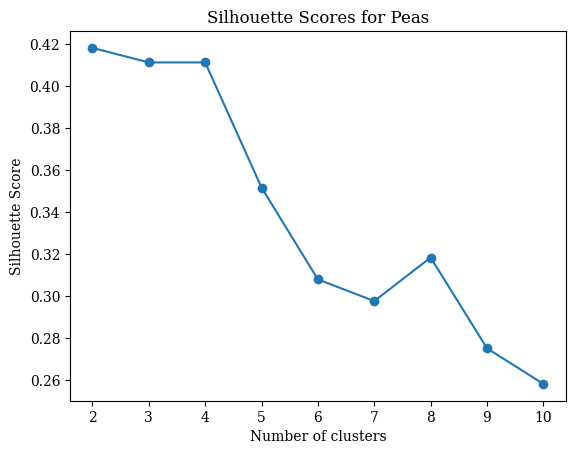

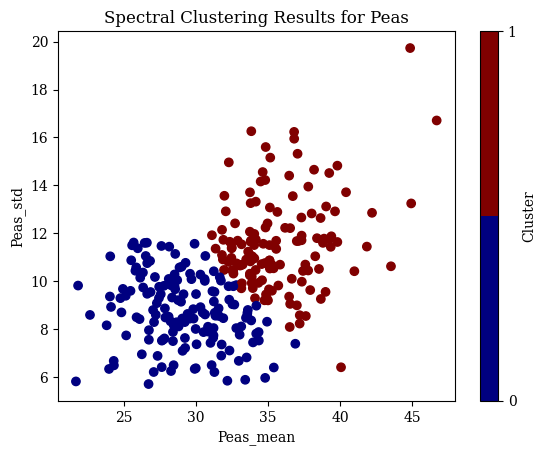

Optimal number of clusters for Barley: 2
Silhouette scores for Barley: [0.3670150384861933, 0.3348533092557515, 0.35587068730107074, 0.33419606793807277, 0.349010098057453, 0.35693409598836556, 0.323058637873144, 0.3233099176198432, 0.34235735762646646]


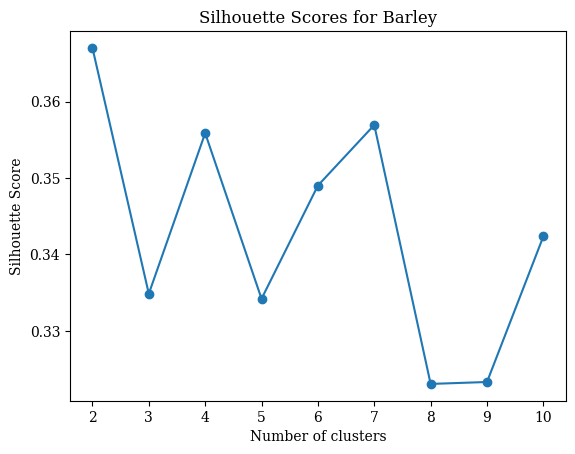

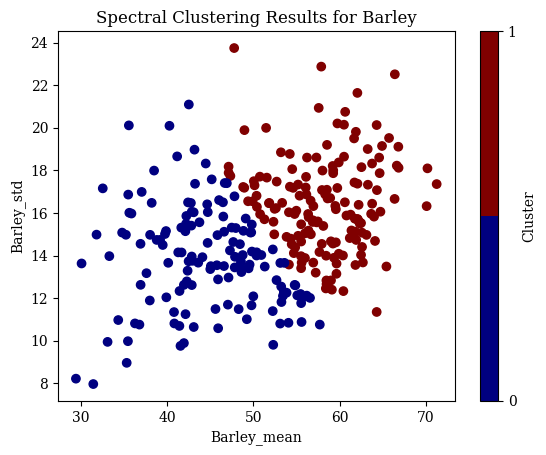

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform spectral clustering and choose the optimal number of clusters
def spectral_clustering(data, n_clusters):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Function to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    scores = []
    for k in range(2, max_k+1):
        labels = spectral_clustering(data, k)
        score = silhouette_score(data, labels)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k, scores

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters
    optimal_k, scores = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform spectral clustering with the optimal number of clusters
    labels = spectral_clustering(crop_data_scaled, optimal_k)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Optimal_Cluster_Spectral'] = np.nan
    df_agg_00_23.loc[~df_agg_00_23[[f'{crop}_mean', f'{crop}_std']].isna().any(axis=1), f'{crop}_Optimal_Cluster_Spectral'] = labels
    
    # Print the results
    print(f'Optimal number of clusters for {crop}: {optimal_k}')
    print(f'Silhouette scores for {crop}: {scores}')
    
    # Visualize the silhouette scores
    plt.plot(range(2, 11), scores, marker='o')
    plt.title(f'Silhouette Scores for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Visualize the clustering results
    cmap = plt.get_cmap('jet', optimal_k)
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], 
                c=df_agg_00_23[f'{crop}_Optimal_Cluster_Spectral'], cmap=cmap)
    plt.title(f'Spectral Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster', ticks=np.linspace(-2, 2, 5))
    plt.show()

### Customized Clusters by Expert

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Perform spectral clustering with a fixed number of clusters
def perform_spectral_clustering(data, n_clusters=5):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Perform spectral clustering with 5 clusters
    labels = perform_spectral_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Fixed_Cluster_Spectral'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_Fixed_Cluster_Spectral'] = labels

# Display the dataframe with the new cluster columns
df_agg_00_23

RM  Canola_mean  Canola_std  Spring Wheat_mean  Spring Wheat_std  \
0      1    28.314583    7.251919          38.569130          9.937700   
1      2    29.668750    5.456009          38.728261          8.209199   
2      3    27.938750    6.955191          37.818750          8.898998   
3      4    26.847917    6.624128          34.304583          8.999300   
4      5    26.401667    7.654146          31.305000          7.488937   
..   ...          ...         ...                ...               ...   
291  520    31.642917   11.245617          41.914167         12.705160   
292  555    34.171765   12.309706          45.965385         21.635478   
293  561    33.493636   10.563191          44.946087         14.381770   
294  588    31.999583    9.736271          44.596250         12.508024   
295  622    33.302500   11.868386          48.816250         16.470610   

     Durum_mean  Durum_std  Oats_mean   Oats_std  Lentils_mean  ...  \
0     29.716000   5.769946  68.702917  21.210231     11.716667  ...   
1     36.761250  12.107829  65.697917  15.301719     18.819643  ...   
2     38.888750   8.297462  61.715417   9.990864     15.459217  ...   
3     34.329583  10.130348  53.237619  17.791265     21.702795  ...   
4     34.202083   9.808930  51.038462  15.160395     19.988108  ...   
..          ...        ...        ...        ...           ...  ...   
291         NaN        NaN  89.890952  27.648040     11.116667  ...   
292         NaN        NaN  74.849412  25.576126           NaN  ...   
293         NaN        NaN  77.994500  19.927426     21.083333  ...   
294   31.250000  14.361407  78.482917  20.325299     20.659524  ...   
295         NaN        NaN  79.000417  26.985072           NaN  ...   

     Lentils_Optimal_Cluster_Spectral  Peas_Optimal_Cluster_Spectral  \
0                                 0.0                            1.0   
1                                 0.0                            1.0   
2                                 0.0                            0.0   
3                                 0.0                            0.0   
4                                 0.0                            0.0   
..                                ...                            ...   
291                               NaN                            1.0   
292                               NaN                            NaN   
293                               0.0                            1.0   
294                               0.0                            1.0   
295                               NaN                            1.0   

     Barley_Optimal_Cluster_Spectral  Canola_Fixed_Cluster_Spectral  \
0                                1.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                1.0                            0.0   
..                               ...                            ...   
291                              1.0                            1.0   
292                              1.0                            1.0   
293                              1.0                            3.0   
294                              1.0                            3.0   
295                              1.0                            1.0   

     Spring Wheat_Fixed_Cluster_Spectral  Durum_Fixed_Cluster_Spectral  \
0                                    3.0                           0.0   
1                                    3.0                           0.0   
2                                    3.0                           0.0   
3                                    0.0                           0.0   
4                                    0.0                           0.0   
..                                   ...                           ...   
291                         

### Vizualizing Clustering Raw Outputs

In [ ]:
pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}),
         df_agg_00_23,
          on='RM' )\
            .explore('Canola_Fixed_Cluster_Spectral',
                     cmap='RdYlGn',
                     scheme='naturalbreaks',
                     k=5)

### Vizualizing Ranked Clusters

In [35]:
# Ranking by historical yield
def ordering_cluster(data,cluster_var,crop_mean):
    cluster_order = data.groupby(cluster_var).mean()[crop_mean].sort_values()
    i = 0
    clusters_to_replace_canola = {}
    for x in cluster_order.index:
        clusters_to_replace_canola[x] = i
        i = i+1
    df_agg_00_23[cluster_var]=df_agg_00_23[cluster_var].replace(to_replace=clusters_to_replace_canola)
    return data        

df_agg_00_23 = ordering_cluster(df_agg_00_23,'Canola_Fixed_Cluster_Spectral','Canola_mean')

In [ ]:
pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}),
         df_agg_00_23,
          on='RM' )\
            .explore('Canola_Fixed_Cluster_Spectral',
                     cmap='RdYlGn',
                     scheme='naturalbreaks',
                     k=5)

## K-Means Clustering

### Raw Clusters

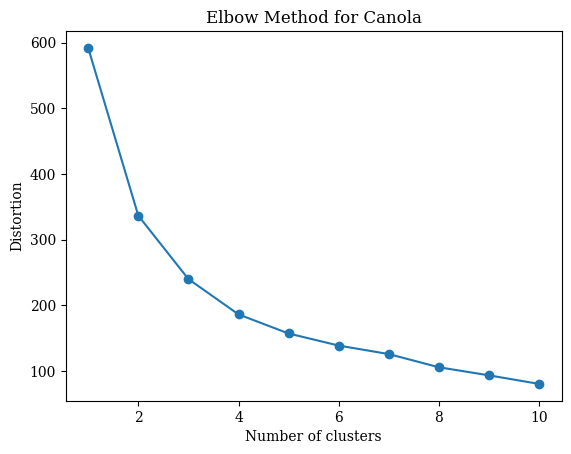

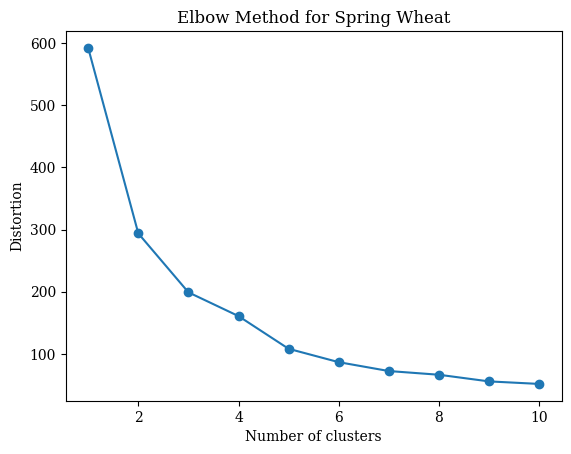

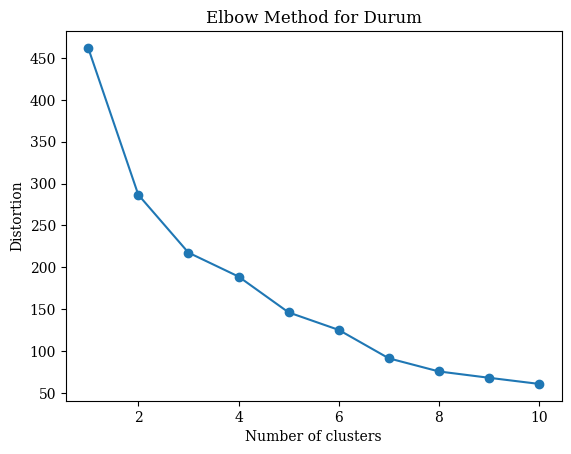

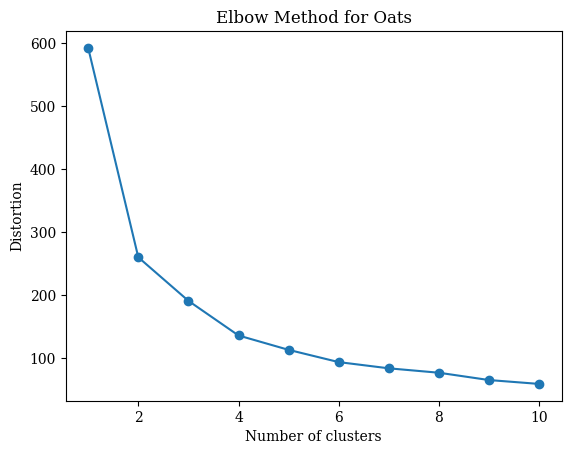

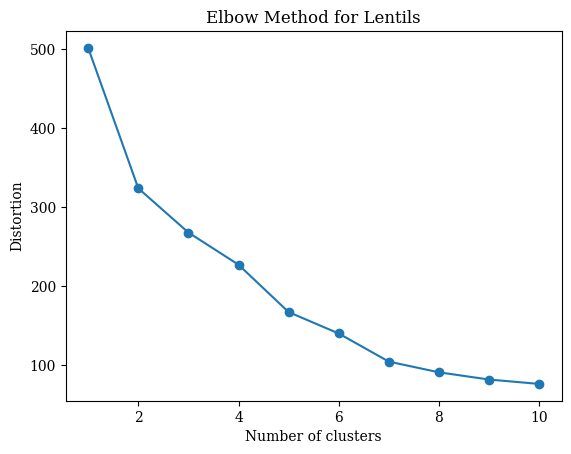

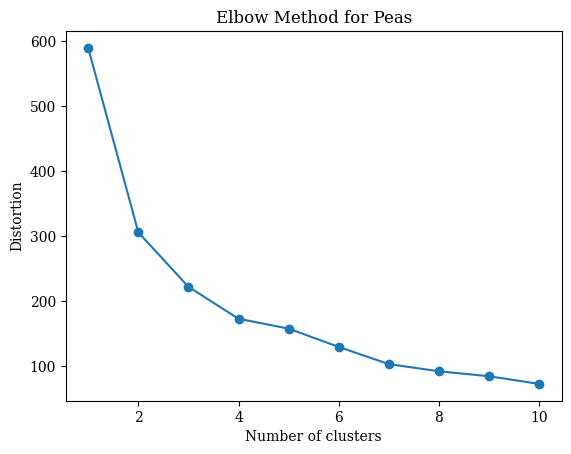

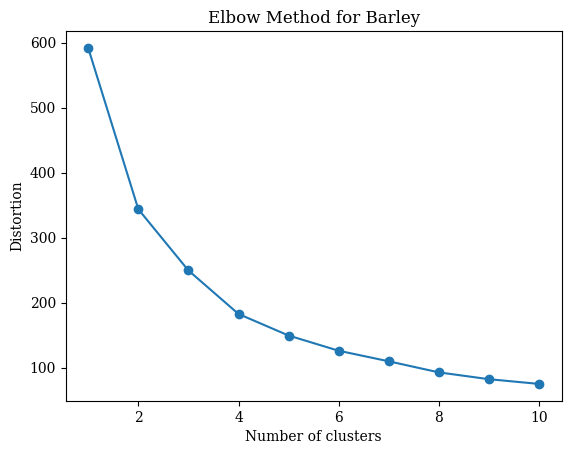

RM  Canola_mean  Canola_std  Spring Wheat_mean  Spring Wheat_std  \
0      1    28.314583    7.251919          38.569130          9.937700   
1      2    29.668750    5.456009          38.728261          8.209199   
2      3    27.938750    6.955191          37.818750          8.898998   
3      4    26.847917    6.624128          34.304583          8.999300   
4      5    26.401667    7.654146          31.305000          7.488937   
..   ...          ...         ...                ...               ...   
291  520    31.642917   11.245617          41.914167         12.705160   
292  555    34.171765   12.309706          45.965385         21.635478   
293  561    33.493636   10.563191          44.946087         14.381770   
294  588    31.999583    9.736271          44.596250         12.508024   
295  622    33.302500   11.868386          48.816250         16.470610   

     Durum_mean  Durum_std  Oats_mean   Oats_std  Lentils_mean  ...  \
0     29.716000   5.769946  68.702917  21.210231     11.716667  ...   
1     36.761250  12.107829  65.697917  15.301719     18.819643  ...   
2     38.888750   8.297462  61.715417   9.990864     15.459217  ...   
3     34.329583  10.130348  53.237619  17.791265     21.702795  ...   
4     34.202083   9.808930  51.038462  15.160395     19.988108  ...   
..          ...        ...        ...        ...           ...  ...   
291         NaN        NaN  89.890952  27.648040     11.116667  ...   
292         NaN        NaN  74.849412  25.576126           NaN  ...   
293         NaN        NaN  77.994500  19.927426     21.083333  ...   
294   31.250000  14.361407  78.482917  20.325299     20.659524  ...   
295         NaN        NaN  79.000417  26.985072           NaN  ...   

     Durum_Optimal_Cluster_KMeans  Durum_Fixed_Cluster_KMeans  \
0                             0.0                         1.0   
1                             1.0                         2.0   
2                             0.0                         2.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
..                            ...                         ...   
291                           NaN                         NaN   
292                           NaN                         NaN   
293                           NaN                         NaN   
294                           0.0                         2.0   
295                           NaN                         NaN   

     Oats_Optimal_Cluster_KMeans  Oats_Fixed_Cluster_KMeans  \
0                            0.0                        3.0   
1                            0.0                        2.0   
2                            0.0                        2.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
..                           ...                        ...   
291                          1.0                        4.0   
292                          1.0                        4.0   
293                          1.0                        3.0   
294                          1.0                        3.0   
295                          1.0                        4.0   

     Lentils_Optimal_Cluster_KMeans  Lentils_Fixed_Cluster_KMeans  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           0.0   
3                               0.0                           1.0   
4                               0.0                           1.0   
..                              ...                           ...   
291                             NaN                           NaN   
292                             NaN                           NaN   
293                             1.0                           2.0   
294                             0.0 

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform K-Means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    return labels

# Function to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    scores = []
    for k in range(2, max_k+1):
        labels = spectral_clustering(data, k)
        score = silhouette_score(data, labels)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k, scores

# Function to find the optimal number of clusters using the Elbow method
# This function will not give the optimum clusters
def find_optimal_clusters_elbow(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    optimal_k = distortions.index(min(distortions[1:])) + 1
    return optimal_k, distortions

# Ranking by historical yield
def ordering_cluster(data,cluster_var,crop_mean):
    cluster_order = data.groupby(cluster_var).mean()[crop_mean].sort_values()
    i = 0
    clusters_to_replace = {}
    for x in cluster_order.index:
        clusters_to_replace[x] = i
        i = i+1
    df_agg_00_23[cluster_var]=df_agg_00_23[cluster_var].replace(to_replace=clusters_to_replace)
    return data        

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Optimal number of clusters using the silhouette_score method
    optimal_k, scores = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform K-Means clustering with the optimal number of clusters
    optimal_labels = kmeans_clustering(crop_data_scaled, optimal_k)
    
    # Perform K-Means clustering with 5 clusters
    fixed_labels = kmeans_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Optimal_Cluster_KMeans'] = np.nan
    df_agg_00_23[f'{crop}_Fixed_Cluster_KMeans'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_Optimal_Cluster_KMeans'] = optimal_labels
    df_agg_00_23.loc[indices, f'{crop}_Fixed_Cluster_KMeans'] = fixed_labels
    # Ranking by historical yield - cluster mean
    df_agg_00_23 = ordering_cluster(df_agg_00_23,f'{crop}_Optimal_Cluster_KMeans', f'{crop}_mean')
    df_agg_00_23 = ordering_cluster(df_agg_00_23,f'{crop}_Fixed_Cluster_KMeans', f'{crop}_mean')
    
    
    # number of clusters using the Elbow method (If we want to get the optimal clusters 
    # using elbow method we have to find the elbow manually
    optimal_k_elbow, distortions = find_optimal_clusters_elbow(crop_data_scaled, 10)
    # Plot the Elbow method graph
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title(f'Elbow Method for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# Display the dataframe with the new cluster columns
df_agg_00_23

In [ ]:
pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}),
         df_agg_00_23,
          on='RM' )\
            .explore('Canola_Fixed_Cluster_KMeans',
                     cmap='RdYlGn',
                     scheme='naturalbreaks',
                     k=5)

### Ranked KMeans Clusters

In [39]:
# Ranking by historical yield
df_agg_00_23.groupby('Canola_Fixed_Cluster_KMeans').mean()['Canola_mean'].sort_values()

Canola_Fixed_Cluster_KMeans
0.0    21.063251
1.0    27.434126
2.0    28.373715
3.0    32.223709
4.0    34.180173
Name: Canola_mean, dtype: float64

In [ ]:
pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}),
         df_agg_00_23,
          on='RM' )\
            .explore('Lentils_Fixed_Cluster_KMeans',
                     cmap='RdYlGn',
                     scheme='naturalbreaks',
                     k=5)

C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mapclassify\classifiers.py:705: UserWarning: Numba not installed. Using slow pure python version.
  self._set_bins()


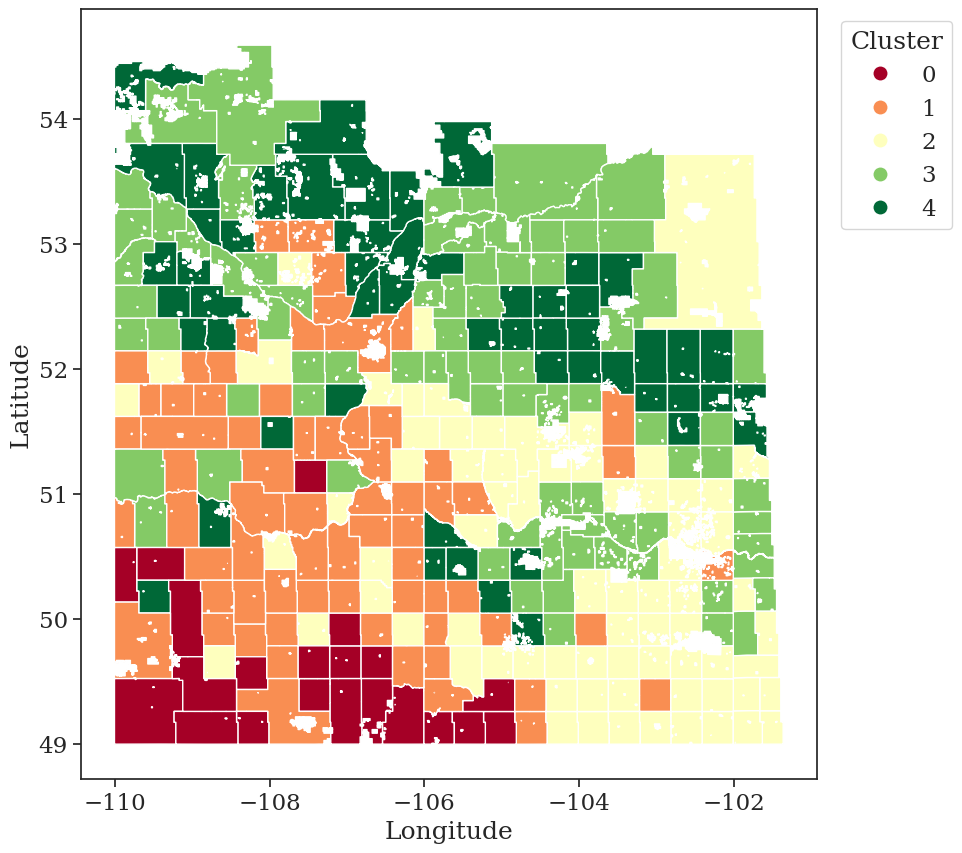

In [505]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
data = pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_agg_00_23, on='RM')
#data["Canola_Fixed_Cluster_KMeans"]=data["Canola_Fixed_Cluster_KMeans"].astype(int)
ax = data.plot(column="Canola_Fixed_Cluster_KMeans",cmap='RdYlGn',legend=True, k=5,scheme="FisherJenksSampled",
               figsize=(10,10),legend_kwds={'labels':(0,1,2,3,4)})
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 1., 0, 0))
leg.set_title("Cluster")
ax.set(ylabel='Latitude', xlabel='Longitude')
plt.savefig('Canola_clusters.jpg',bbox_inches='tight')

In [41]:
Canola_KMeans = pd.merge(gdf_rm_yield_major_crops[['RM','Year','Canola']][gdf_rm_yield_major_crops['Year']>=2000], df_agg_00_23[['RM','Canola_Fixed_Cluster_KMeans']], on='RM')
Canola_KMeans["Canola_Fixed_Cluster_KMeans"]=Canola_KMeans["Canola_Fixed_Cluster_KMeans"].astype(int)

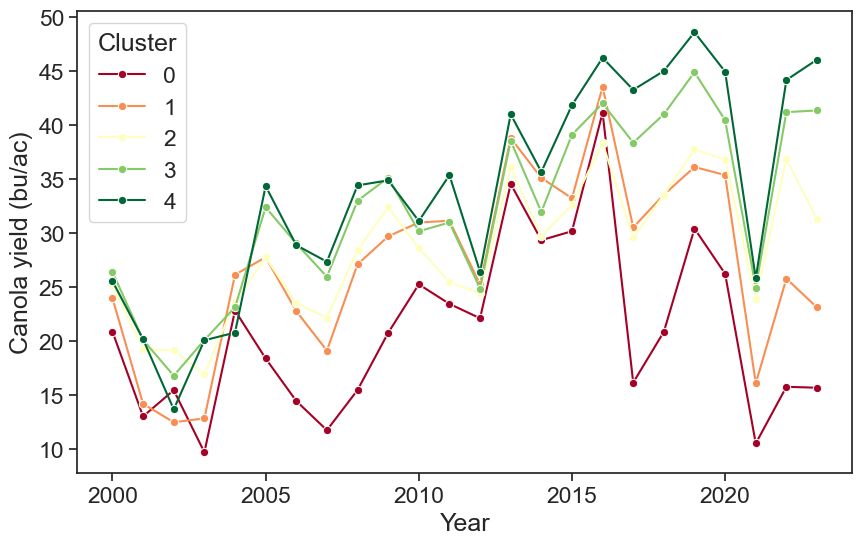

In [42]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks')
data = Canola_KMeans.groupby(['Canola_Fixed_Cluster_KMeans', 'Year']).mean()
data = data.reset_index()
cmap = plt.get_cmap("RdBu_r")
palette = 'RdYlGn'
plt.figure(figsize=(10,6))
plot = sns.lineplot(x="Year", y="Canola", hue="Canola_Fixed_Cluster_KMeans", data=data,palette=palette,marker='o')
plot.set(ylabel='Canola yield (bu/ac)', xlabel='Year')
plot.legend(title="Cluster")
figure = plot.get_figure()    
figure.savefig('Canola_trend.jpg', dpi=600,bbox_inches="tight")

C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


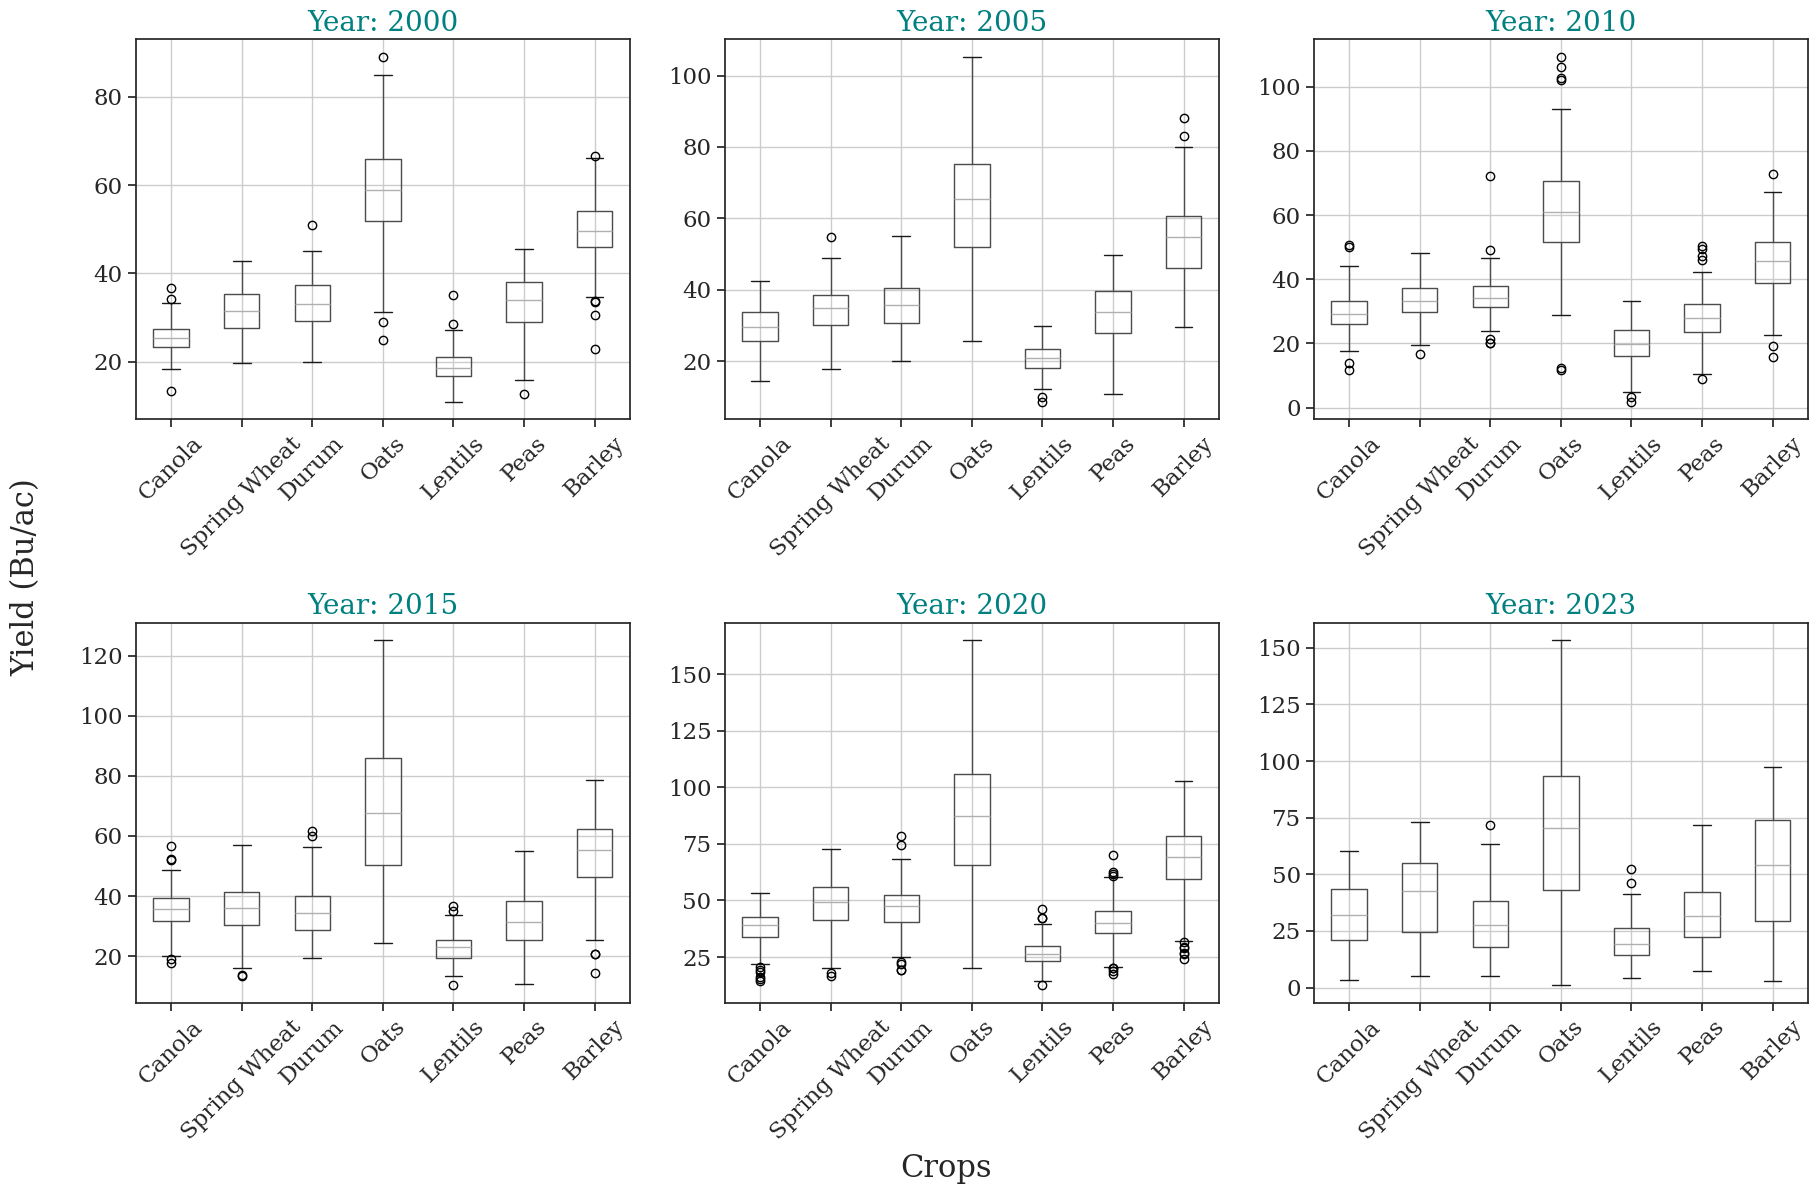

In [43]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
# Filter the DataFrame for the years 2004-2023
filtered_df = gdf_rm_yield_major_crops[(df_major_crops['Year'] >= 2000) & (df_major_crops['Year'] <= 2023)]

# Define the list of crops
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the years and create a boxplot for each crop
i = 0
for year in (2000,2005,2010,2015,2020,2023):
    if i < len(axes):
        ax = axes[i]
        year_data = filtered_df[filtered_df['Year'] == year]
        year_data.boxplot(column=crops, ax=ax)
        ax.set_title(f'Year: {year}', size=20, color='teal')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
        i = i+1
i = i - 1
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.text(0.5, 0.0, 'Crops', ha='center')
fig.text(-0.02, 0.5, 'Yield (Bu/ac)', va='center', rotation='vertical')
plt.tight_layout()
plt.show()
fig.savefig('bar_plot.jpg', dpi=600,bbox_inches="tight")

C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mapclassify\classifiers.py:705: UserWarning: Numba not installed. Using slow pure python version.
  self._set_bins()
C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mapclassify\classifiers.py:705: UserWarning: Numba not installed. Using slow pure python version.
  self._set_bins()
C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mapclassify\classifiers.py:705: UserWarning: Numba not installed. Using slow pure python version.
  self._set_bins()
C:\Users\nalantha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mapclassify\classifiers.py:705: UserWarning: Numba not installed. Using slow pure python version.
  self._set_bins()


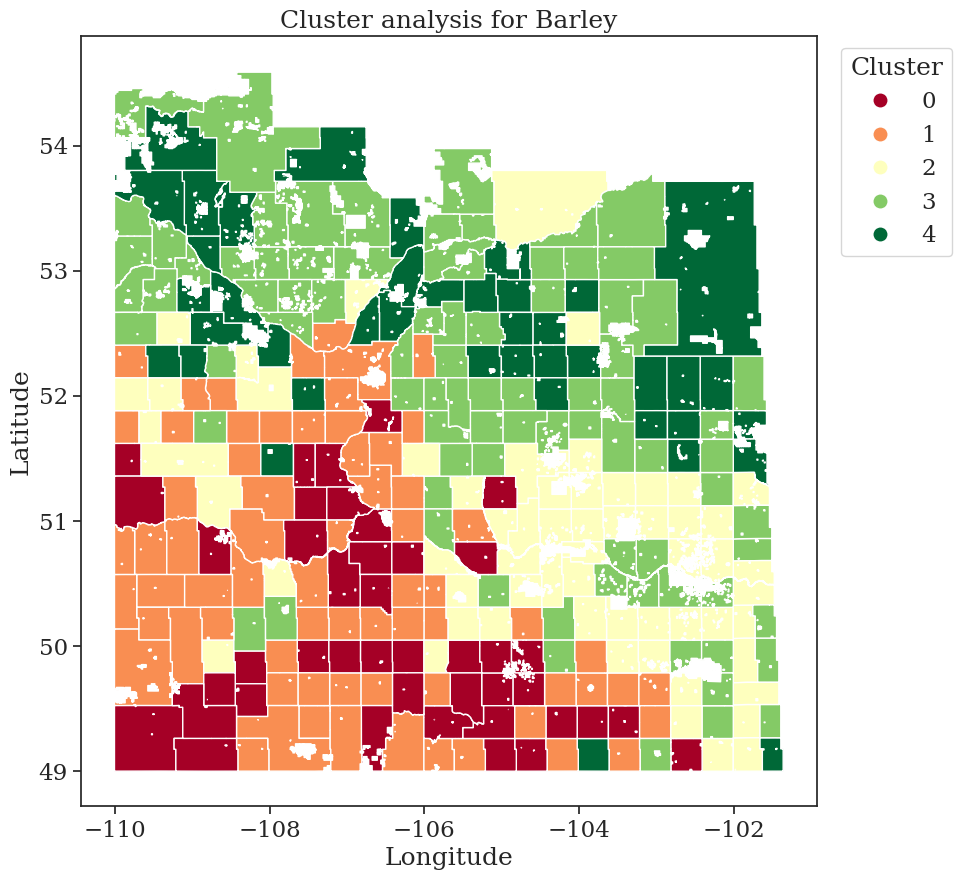

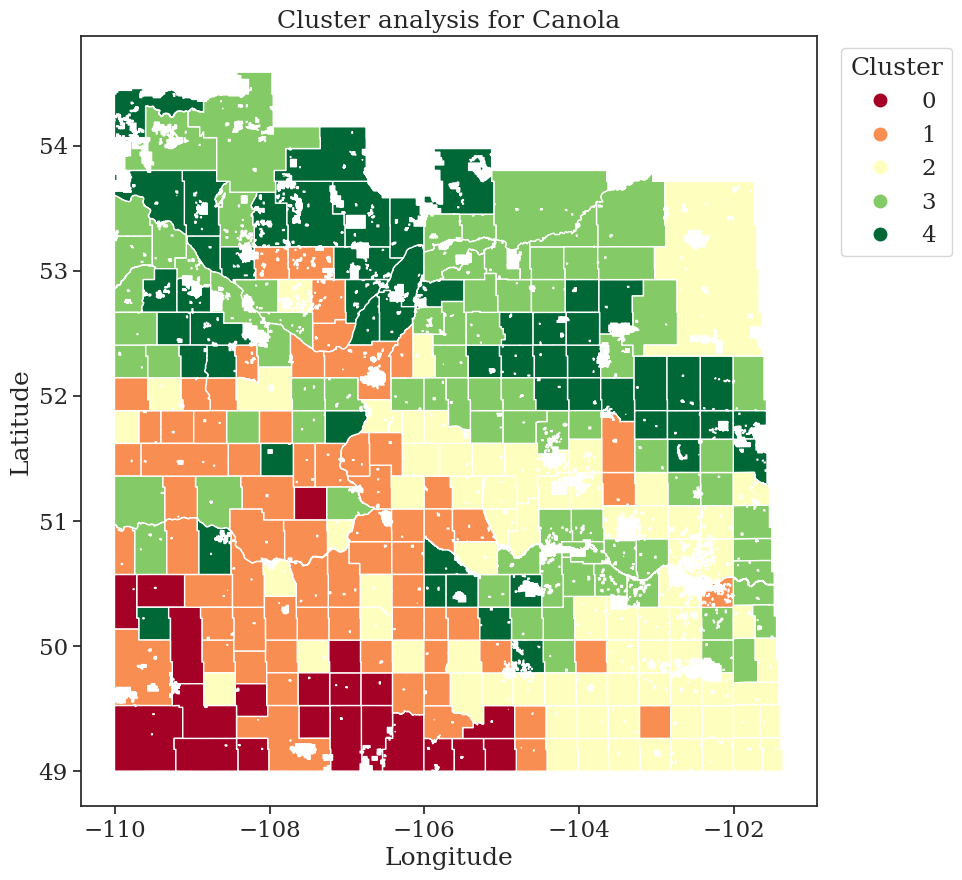

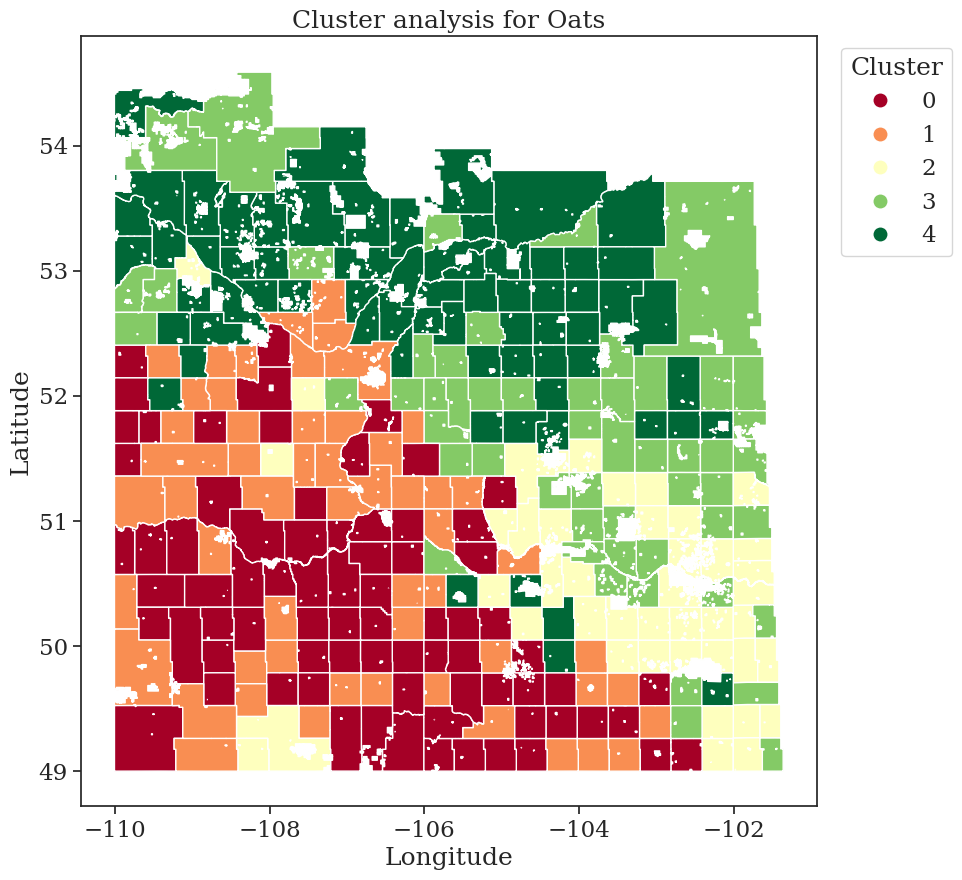

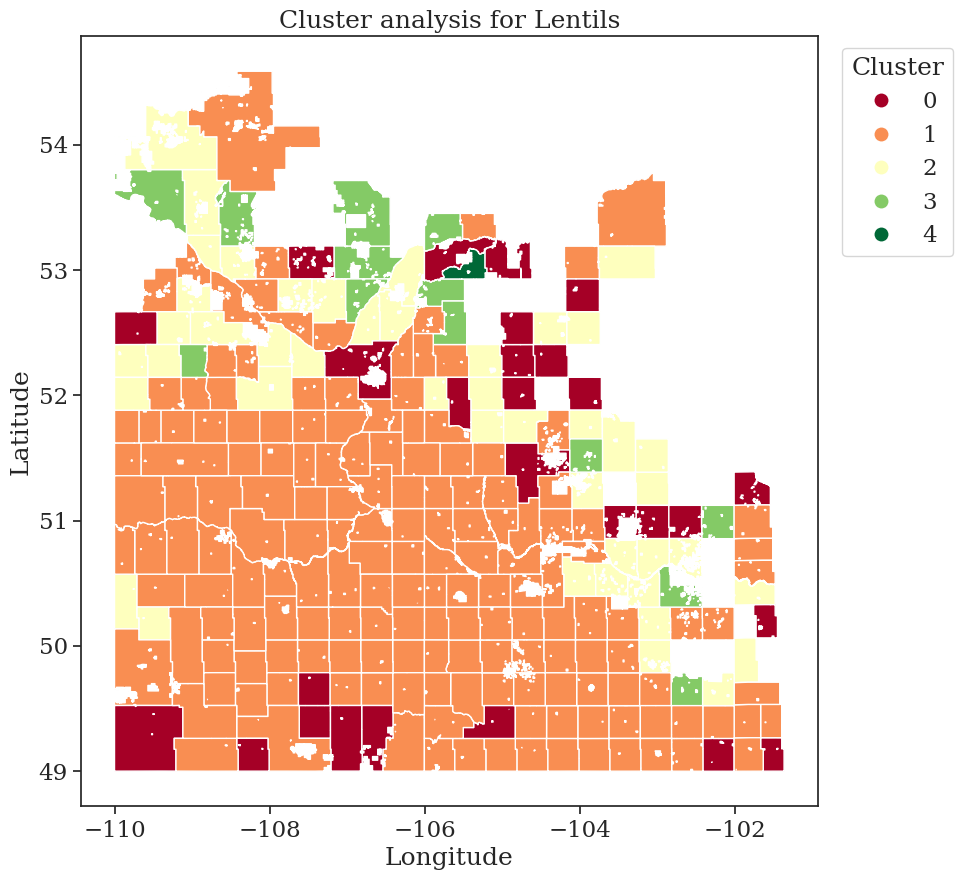

In [44]:
crops = ['Barley','Canola','Oats','Lentils']
for crop in crops:
    kmean_var = f'{crop}_Fixed_Cluster_KMeans'
    data_temp = pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_agg_00_23[['RM',kmean_var]], on='RM')
    #data_temp.dropna()
    ax = data_temp.plot(column=kmean_var,cmap='RdYlGn',legend=True, scheme="FisherJenksSampled",
               k=5,figsize=(10,10),legend_kwds={'labels':(0,1,2,3,4)})
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.2, 1., 0, 0))
    leg.set_title("Cluster")
    ax.set(ylabel='Latitude', xlabel='Longitude',title=f'Cluster analysis for {crop}')
#plt.savefig('Canola_clusters.jpg',bbox_inches='tight')